# Train_Test_Split

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/Student/Desktop/FD2.csv")

# Create arrays for features and target variable
y = df['stars_review']
y = np.asarray(y, dtype="|S6")
X = df.drop(['stars_review'], axis=1)



In [2]:
type(y)
print(df.info())
print(y)
print(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154910 entries, 0 to 154909
Columns: 239 entries, funny_review to female
dtypes: float64(54), int64(185)
memory usage: 282.5 MB
None
[b'1.0' b'1.0' b'0.75' ... b'0.25' b'0.0' b'0.5']
        funny_review  useful_review  cool_review  Year.2005  Year.2006  \
0           0.000000       0.714286     0.285714          0          0   
1           0.000000       0.000000     0.000000          0          0   
2           0.000000       1.000000     0.000000          0          0   
3           0.125000       0.375000     0.500000          0          0   
4           0.222222       0.388889     0.388889          0          0   
5           0.000000       0.000000     0.000000          0          0   
6           0.000000       1.000000     0.000000          0          0   
7           0.000000       0.500000     0.500000          0          0   
8           0.000000       0.666667     0.333333          0          0   
9           0.000000       

In [3]:
# Train, Test, Validation Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# LDA Processing

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [6]:
X_test_lda = lda.transform(X_test)

In [7]:
X_train_lda = pd.DataFrame(X_train_lda)
X_train_lda.to_csv("C:/Users/Student/Desktop/X_train_lda.csv", index=False, header=True)

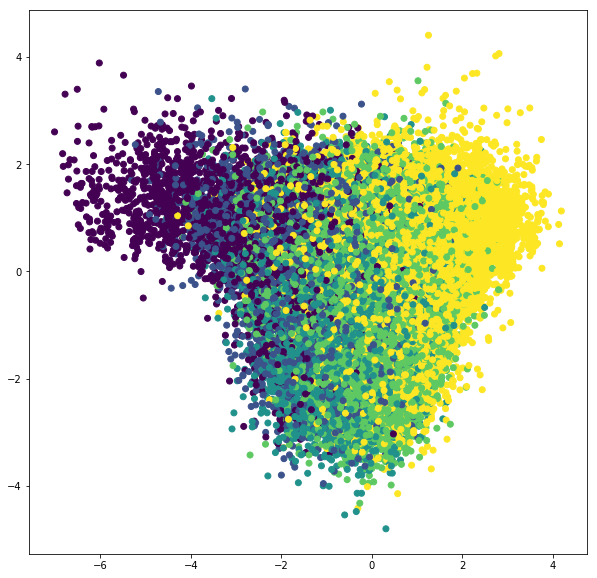

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.scatter(X_train_lda.iloc[:, 0], X_train_lda.iloc[:, 1],marker='o',c=y_train)
plt.show()